In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0450 - accuracy: 0.9804 - val_loss: 0.0958 - val_accuracy: 0.9752
Epoch 1002/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0451 - accuracy: 0.9807 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 1003/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0465 - accuracy: 0.9817 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 1004/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0458 - accuracy: 0.9804 - val_loss: 0.0942 - val_accuracy: 0.9752
Epoch 1005/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0453 - accuracy: 0.9828 - val_loss: 0.0936 - val_accuracy: 0.9752
Epoch 1006/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0446 - accuracy: 0.9817 - val_loss: 0.0934 - val_accuracy: 0.9752
Epoch 1007/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0445 - accuracy: 0.983

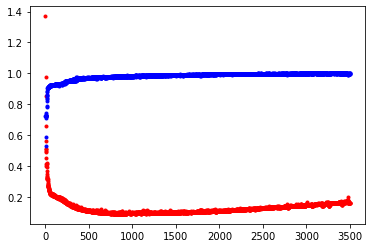

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
